In [1]:
# In this file we compare the progression of the cost function vs. iteration
# for 3 cases:
# 1) full gradient descent
# 2) batch gradient descent
# 3) stochastic gradient descent
#
# We use the PCA-transformed data to keep the dimensionality down (D=300)
# I've tailored this example so that the training time for each is feasible.
# So what we are really comparing is how quickly each type of GD can converge,
# (but not actually waiting for convergence) and what the cost looks like at
# each iteration.
#
# For the class Data Science: Practical Deep Learning Concepts in Theano and TensorFlow
# https://deeplearningcourses.com/c/data-science-deep-learning-in-theano-tensorflow
# https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

from util import get_transformed_data, forward, error_rate, cost, gradW, gradb, y2indicator


def main():
    X, Y, _, _ = get_transformed_data()
    X = X[:, :300]

    # normalize X first
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mu) / std

    print("Performing logistic regression...")
    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]

    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    # 1. full
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    for i in range(200):
        p_y = forward(Xtrain, W, b)

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)
        

        p_y_test = forward(Xtest, W, b)
        ll = cost(p_y_test, Ytest_ind)
        LL.append(ll)
        if i % 10 == 0:
            err = error_rate(p_y_test, Ytest)
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for full GD:", datetime.now() - t0)


    # 2. stochastic
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL_stochastic = []
    lr = 0.0001
    reg = 0.01

    t0 = datetime.now()
    for i in range(1): # takes very long since we're computing cost for 41k samples
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for n in range(min(N, 500)): # shortcut so it won't take so long...
            x = tmpX[n,:].reshape(1,D)
            y = tmpY[n,:].reshape(1,10)
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_stochastic.append(ll)

            if n % (N//2) == 0:
                err = error_rate(p_y_test, Ytest)
                print("Cost at iteration %d: %.6f" % (i, ll))
                print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for SGD:", datetime.now() - t0)


    # 3. batch
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL_batch = []
    lr = 0.0001
    reg = 0.01
    batch_sz = 500
    n_batches = N // batch_sz

    t0 = datetime.now()
    for i in range(50):
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for j in range(n_batches):
            x = tmpX[j*batch_sz:(j*batch_sz + batch_sz),:]
            y = tmpY[j*batch_sz:(j*batch_sz + batch_sz),:]
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_batch.append(ll)
            if j % (n_batches//2) == 0:
                err = error_rate(p_y_test, Ytest)
                print("Cost at iteration %d: %.6f" % (i, ll))
                print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for batch GD:", datetime.now() - t0)



    x1 = np.linspace(0, 1, len(LL))
    plt.plot(x1, LL, label="full")
    x2 = np.linspace(0, 1, len(LL_stochastic))
    plt.plot(x2, LL_stochastic, label="stochastic")
    x3 = np.linspace(0, 1, len(LL_batch))
    plt.plot(x3, LL_batch, label="batch")
    plt.legend()
    plt.show()

Reading in and transforming data...


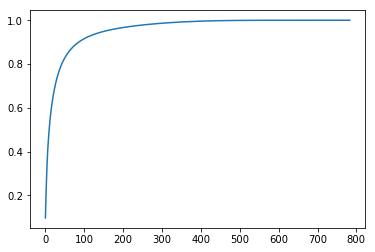

Performing logistic regression...
Cost at iteration 0: 880.502191
Error rate: 0.168
Cost at iteration 10: 356.558117
Error rate: 0.086
Cost at iteration 20: 315.996288
Error rate: 0.077
Cost at iteration 30: 299.725487
Error rate: 0.075
Cost at iteration 40: 290.932661
Error rate: 0.074
Cost at iteration 50: 285.447729
Error rate: 0.073
Cost at iteration 60: 281.708138
Error rate: 0.069
Cost at iteration 70: 278.995992
Error rate: 0.07
Cost at iteration 80: 276.936578
Error rate: 0.07
Cost at iteration 90: 275.315805
Error rate: 0.07
Cost at iteration 100: 274.002710
Error rate: 0.071
Cost at iteration 110: 272.912799
Error rate: 0.072
Cost at iteration 120: 271.989202
Error rate: 0.072
Cost at iteration 130: 271.192325
Error rate: 0.072
Cost at iteration 140: 270.493834
Error rate: 0.073
Cost at iteration 150: 269.872990
Error rate: 0.073
Cost at iteration 160: 269.314330
Error rate: 0.073
Cost at iteration 170: 268.806138
Error rate: 0.073
Cost at iteration 180: 268.339421
Error rate

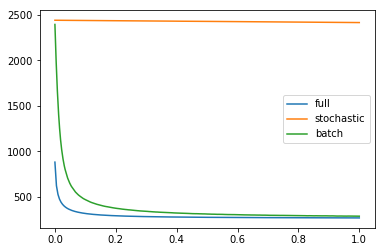

In [2]:
main()